In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

get_ipython().run_line_magic('matplotlib', 'inline')

sns.set_style('whitegrid')

In [11]:
df = pd.read_excel(r"C:\Users\jfrank\OneDrive - Specialized Bicycle Components\Projects\Saddles\Custom Saddles\CoP Movement Pilots\20200625_KT\20200625_summarydata.xlsx")
#df = pd.read_excel('1.1_KT.xlsx')
#df.info()
df.head()
#df.set_index('Frame Id',inplace = True)

power     hc  hc_std     vc  vc_std      P  P_std        F   F_std
0     1  26.00    0.32  33.00   0.740  53.58   2.20  1034.00   43.13
1     1  26.72    0.38  32.80   0.860  52.10   2.41  1031.60   58.71
2     2  26.02    0.47  32.86   0.770  48.69   2.18   935.14   51.59
3     2  26.12    0.58  33.34   0.967  53.83   4.50  1054.90  117.40
4     2  26.12    0.73  33.08   1.130  42.59   9.25   804.48  213.30

In [82]:
grouped_d = df.groupby("power").mean()
grouped_d["vc_std"] = grouped_d["vc_std"]/2
grouped_d






hc    hc_std         vc    vc_std          P     P_std  \
power                                                                  
1      26.360000  0.350000  32.900000  0.400000  52.840000  2.305000   
2      26.649091  0.638182  32.916364  0.481682  47.251818  4.167273   
3      26.330000  0.550000  32.925000  0.382500  52.255000  2.525000   
4      26.560000  0.750000  33.110000  0.417500  49.675000  2.855000   
5      26.980000  1.005000  32.890000  0.477500  42.825000  3.305000   
6      26.930000  1.310000  33.040000  0.480000  39.980000  4.260000   
7      26.680000  1.585000  33.095000  0.457500  36.560000  4.445000   
2off   26.056667  0.563333  32.656667  0.816667  32.926667  3.363333   

                 F       F_std  
power                           
1      1032.800000   50.920000  
2       922.033636  103.288182  
3      1045.700000   63.615000  
4       989.850000   83.125000  
5       825.810000   84.130000  
6       749.120000  105.420000  
7       661.775000  100.300000  
2off    619.136667   75.866667

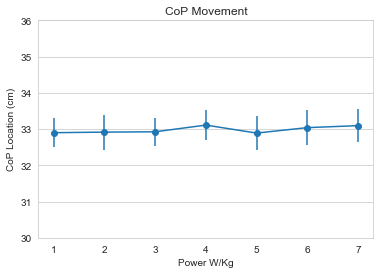

In [83]:

plt.title('CoP Movement')
plt.xlabel('Power W/Kg')
plt.ylabel('CoP Location (cm)')
#plt.bar(x,df_pmet)
#plt.xticks
plt.ylim(30, 36)
plt.errorbar([1, 2, 3, 4, 5, 6, 7],grouped_d.vc.iloc[0:-1],yerr=grouped_d.vc_std.iloc[0:-1],fmt = 'o-')
plt.grid(axis = "x", which = "both")
plt.show()

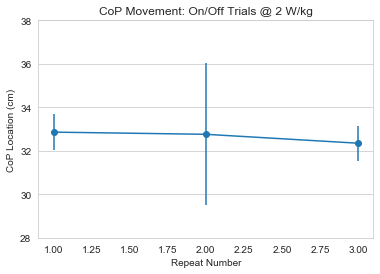

In [93]:
vc_off = df.loc[df.power=='2off'].vc
vc_std_off = df.loc[df.power=='2off'].vc_std


plt.title('CoP Movement: On/Off Trials @ 2 W/kg')
plt.xlabel('Repeat Number')
plt.ylabel('CoP Location (cm)')
#plt.bar(x,df_pmet)
#plt.xticks
plt.ylim(28, 38)
plt.errorbar([1, 2, 3],vc_off,yerr=vc_std_off,fmt = 'o-')
plt.grid(axis = "x", which = "both")
plt.show()

(20, 40)

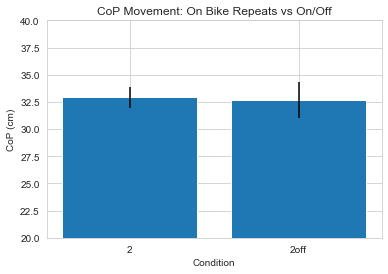

In [79]:
twos = [grouped_d.vc.loc[2],grouped_d.vc.loc['2off']]
twos_std = [grouped_d.vc_std.loc[2],grouped_d.vc_std.loc['2off']]
cond = ['2', '2off']
plt.bar(cond,twos, yerr=twos_std)
plt.title('CoP Movement: On Bike Repeats vs On/Off')
plt.ylabel('CoP (cm)')
plt.xlabel('Condition')
plt.ylim(20,40)